# Notebook 06 – Exploratory Data Analysis (EDA)

**Project:** Tech Job Market Data Analysis  
**Author:** Matheus Prause  
**Date:** 2026  

## Objective
Perform an exploratory data analysis to identify patterns, trends, and
insights related to salaries, job roles, experience levels, and remote work
in the global technology job market.


## 1. Dataset Overview

In [6]:
import pandas as pd

df = pd.read_csv("../datasets/tech_jobs_salaries.csv")

In [7]:
df.shape
df.columns
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


## 2. Data Quality Check

In [8]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

## 3. Descriptive Statistics

In [9]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [10]:
df["salary_in_usd"].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

## 4. Salary Distribution

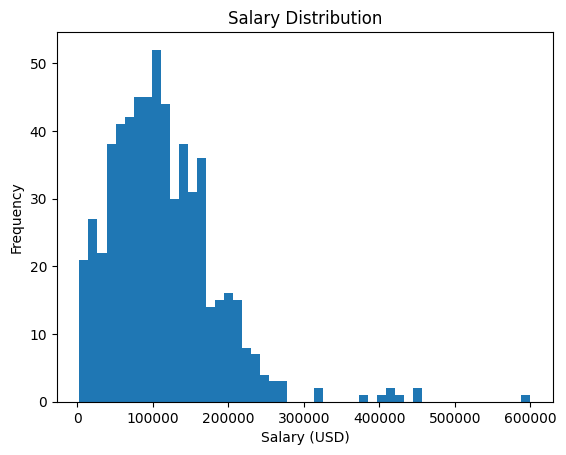

In [11]:
import matplotlib.pyplot as plt

plt.hist(df["salary_in_usd"], bins=50)
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.title("Salary Distribution")
plt.show()

## 5. Salary by Experience Level

In [12]:
df.groupby("experience_level")["salary_in_usd"].mean().sort_values()

experience_level
EN     61643.318182
MI     87996.056338
SE    138617.292857
EX    199392.038462
Name: salary_in_usd, dtype: float64

## 6. Salary by Job Role

In [13]:
df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).head(10)

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Data Architect              177873.909091
Applied Data Scientist      175655.000000
Analytics Engineer          175000.000000
Data Specialist             165000.000000
Head of Data                160162.600000
Name: salary_in_usd, dtype: float64

## 7. Remote Work vs Salary

In [14]:
df.groupby("remote_ratio")["salary_in_usd"].mean()

remote_ratio
0      106354.622047
50      80823.030303
100    122457.454068
Name: salary_in_usd, dtype: float64

### Salary Distribution

The salary distribution is right-skewed, with most salaries concentrated
between USD 50,000 and USD 150,000. A small number of high-paying positions
create significant outliers, suggesting that median salary values may be more
representative of the typical professional in the dataset.

### Salary by Experience Level

Average salaries increase significantly with experience level. Entry-level
positions show substantially lower compensation, while executive-level roles
earn more than three times the entry-level average, highlighting experience as
a key driver of salary growth.

### Top Paying Job Roles

The highest average salaries are associated with leadership and principal
roles, such as Data Analytics Lead and Principal Data Engineer. This indicates
that strategic responsibility and advanced technical expertise are strongly
valued in the data job market.

### Remote Work and Salary

Fully remote positions present the highest average salaries, suggesting that
remote work does not reduce compensation and may even increase it due to
global talent competition.

## Key Insights

- Salary distribution is highly right-skewed, with a small number of roles
earning exceptionally high salaries.
- Experience level has a strong impact on compensation, with executive roles
earning significantly more than entry-level positions.
- Leadership and principal job titles dominate the highest salary rankings.
- Fully remote roles tend to offer higher average salaries compared to on-site
or hybrid positions.